#Extracting and cleaning

In [1]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]
wiki_df = first_table

In [4]:
wiki_df.head()

Symbol             Security  ...      CIK      Founded
0    MMM           3M Company  ...    66740         1902
1    ABT  Abbott Laboratories  ...     1800         1888
2   ABBV          AbbVie Inc.  ...  1551152  2013 (1888)
3   ABMD          ABIOMED Inc  ...   815094         1981
4    ACN        Accenture plc  ...  1467373         1989

[5 rows x 9 columns]

In [5]:
symb = wiki_df['Symbol'].tolist()
name = wiki_df['Security'].tolist()

comp_dict ={}
for s, n in zip(symb, name):
    comp_dict[s] = n

In [6]:
ds = '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/'

df = pd.read_csv('/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020/A.csv')
df_close = df[['Date']]

import os

directory_in_str= '/content/drive/MyDrive/home_repo_big_data/data/500_comp_data_2020'
directory = os.fsencode(directory_in_str)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"): 
        df = pd.read_csv(directory_in_str + '/' + filename)
        df_new = df[['Close']]
        df_close[filename.split('.')[0]] = df_new
        
        continue
    else:
        continue

In [7]:
df_close.shape

(232, 504)

In [8]:
df_close = df_close.set_index('Date')
df_close.head()

MMM       ATVI  ...       ZION         ZTS
Date                               ...                       
2020-01-02  173.538239  58.266792  ...  50.530182  133.375900
2020-01-03  172.043884  58.286655  ...  49.817135  133.395782
2020-01-06  172.207794  59.349670  ...  49.210079  132.371658
2020-01-07  171.513626  59.945747  ...  48.911369  132.819077
2020-01-08  174.145645  59.488754  ...  49.393154  132.530716

[5 rows x 503 columns]

In [9]:
df_movements = df_close.copy()

In [10]:
df_movements_cleaned = df_movements.fillna(df_movements.mean())

cleaned_movements = df_movements_cleaned.to_numpy()
cleaned_movements = cleaned_movements.astype('float64') 
cleaned_movements.shape

(232, 503)

In [11]:
np.any(np.isnan(cleaned_movements))

False

In [12]:
np.all(np.isfinite(cleaned_movements))

True

In [13]:
cur_comps = df_movements_cleaned.columns.to_list()

In [14]:
cleaned_movements.T.shape

(503, 232)

In [15]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(cleaned_movements.T)
X_scale = scaler.transform(cleaned_movements.T)
df_scale = pd.DataFrame(X_scale, columns=df_movements_cleaned.T.columns)
df_scale.head()

Date  2020-01-02  2020-01-03  2020-01-06  ...  2020-11-27  2020-11-30  2020-12-01
0       0.073112    0.072482    0.072551  ...    0.074524    0.072771    0.071840
1       0.052949    0.052967    0.053933  ...    0.071008    0.072226    0.072635
2       0.064847    0.064739    0.064316  ...    0.078420    0.078097    0.079094
3       0.059087    0.058366    0.058672  ...    0.074286    0.074700    0.074886
4       0.047074    0.046519    0.049927  ...    0.075822    0.076435    0.074793

[5 rows x 232 columns]

#Clustering on the original data

In [16]:
df_scale.shape

(503, 232)

Text(0, 0.5, 'Inertia')

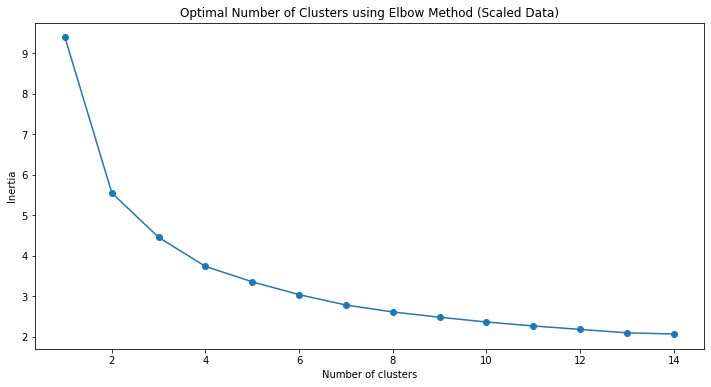

In [17]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(df_scale)
    sse.append([k, km.inertia_])
    
oca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [18]:
df_scale2 = df_scale.copy()
kmeans_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(df_scale2)
print('KMeans Scaled Silhouette Score: {}'.format(silhouette_score(df_scale2, kmeans_scale.labels_, metric='euclidean')))
labels_scale = kmeans_scale.labels_
clusters_scale = pd.concat([df_scale2, pd.DataFrame({'cluster_scaled':labels_scale})], axis=1)

KMeans Scaled Silhouette Score: 0.26146871266955635


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 503 samples in 0.009s...
[t-SNE] Computed neighbors for 503 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 503 / 503
[t-SNE] Mean sigma: 0.037626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.629738
[t-SNE] KL divergence after 950 iterations: 0.580721


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



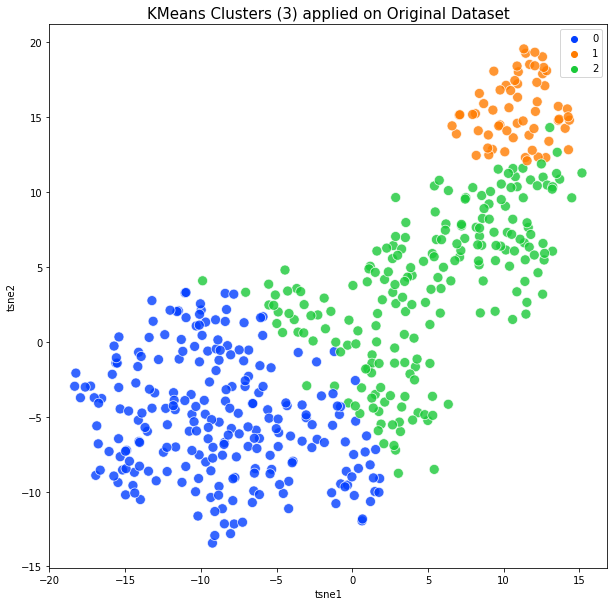

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale2)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
sns.scatterplot(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], 
                hue=labels_scale, 
                palette='bright',
                s=100, alpha=0.8).set_title('KMeans Clusters (3) applied on Original Dataset', fontsize=15)

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 503 samples in 0.013s...
[t-SNE] Computed neighbors for 503 samples in 0.153s...
[t-SNE] Computed conditional probabilities for sample 503 / 503
[t-SNE] Mean sigma: 0.037626
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.345169
[t-SNE] KL divergence after 5000 iterations: 0.537500


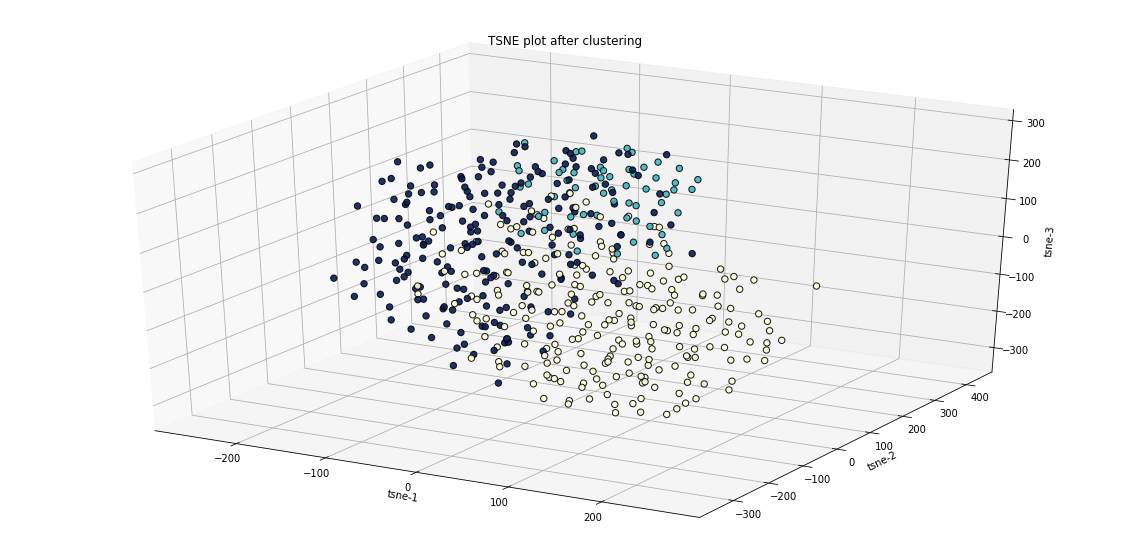

In [20]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(df_scale2)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_scale.iloc[:,0], tsne_df_scale.iloc[:,1], tsne_df_scale.iloc[:,2], 
            c=labels_scale, cmap='YlGnBu',
            edgecolor='k', s=40, alpha = 0.9)


ax.set_title("TSNE plot after clustering")
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")
ax.dist = 10

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

#Clustering by using PCA for feature reduction

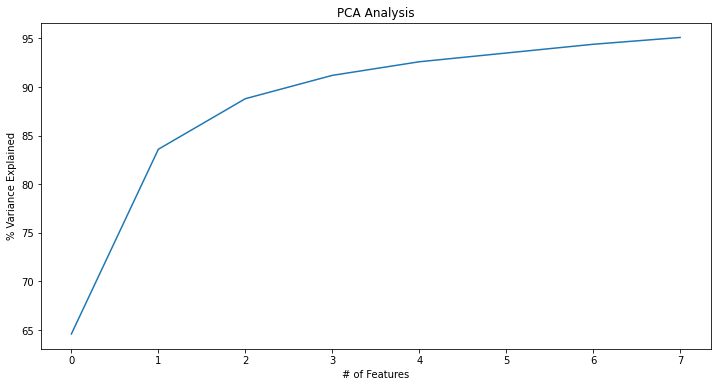

In [21]:
pca = PCA(n_components=0.95)
pca.fit(df_scale)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
# plt.ylim(0,100.5)
plt.plot(var)

In [22]:
num_comps = len(variance)

In [23]:
num_comps

8

In [24]:
pc_cols = []
for i in range(num_comps):
    pc_cols.append('pc'+str(i))

In [25]:
pca = PCA(n_components=num_comps)
pca_scale = pca.fit_transform(df_scale)
pca_df_scale = pd.DataFrame(pca_scale, columns=pc_cols)
print(pca.explained_variance_ratio_)

[0.6461743  0.19011197 0.05212594 0.02375345 0.01436261 0.00942428
 0.0090941  0.00689129]


Applying KMeans to PCA reduced dataset

Text(0, 0.5, 'Inertia')

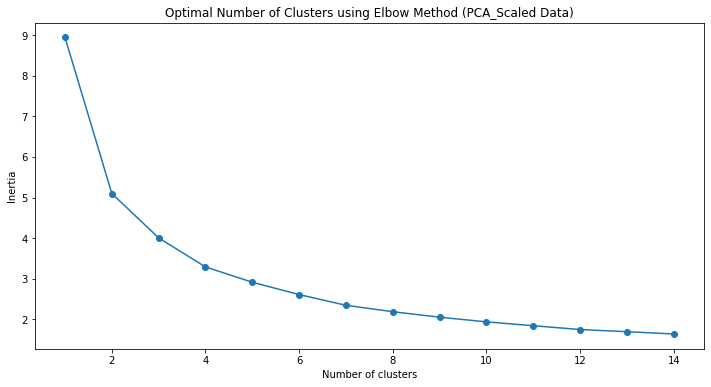

In [26]:
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(pca_df_scale)
    sse.append([k, km.inertia_])
    
pca_results_scale = pd.DataFrame({'Cluster': range(1,15), 'SSE': sse})
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method (PCA_Scaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [27]:
kmeans_pca_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(pca_df_scale)
print('KMeans PCA Scaled Silhouette Score: {}'.format(silhouette_score(pca_df_scale, kmeans_pca_scale.labels_, metric='euclidean')))

labels_pca_scale = kmeans_pca_scale.labels_
clusters_pca_scale = pd.concat([pca_df_scale, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

KMeans PCA Scaled Silhouette Score: 0.28377217545974176


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 503 samples in 0.001s...
[t-SNE] Computed neighbors for 503 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 503 / 503
[t-SNE] Mean sigma: 0.036287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.990589
[t-SNE] KL divergence after 1300 iterations: 0.527403


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



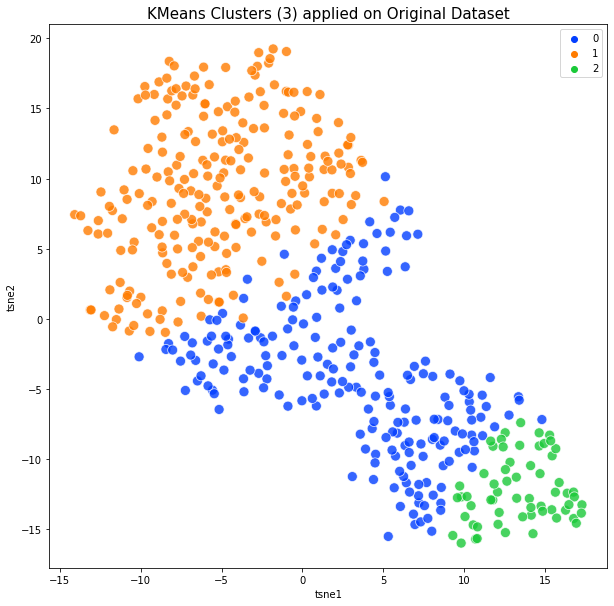

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(pca_df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
plt.figure(figsize = (10,10))
sns.scatterplot(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], 
                hue=labels_pca_scale, 
                palette='bright',
                s=100, alpha=0.8).set_title('KMeans Clusters (3) applied on Original Dataset', fontsize=15)

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 503 samples in 0.001s...
[t-SNE] Computed neighbors for 503 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 503 / 503
[t-SNE] Mean sigma: 0.036287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.625015
[t-SNE] KL divergence after 5000 iterations: 0.453818


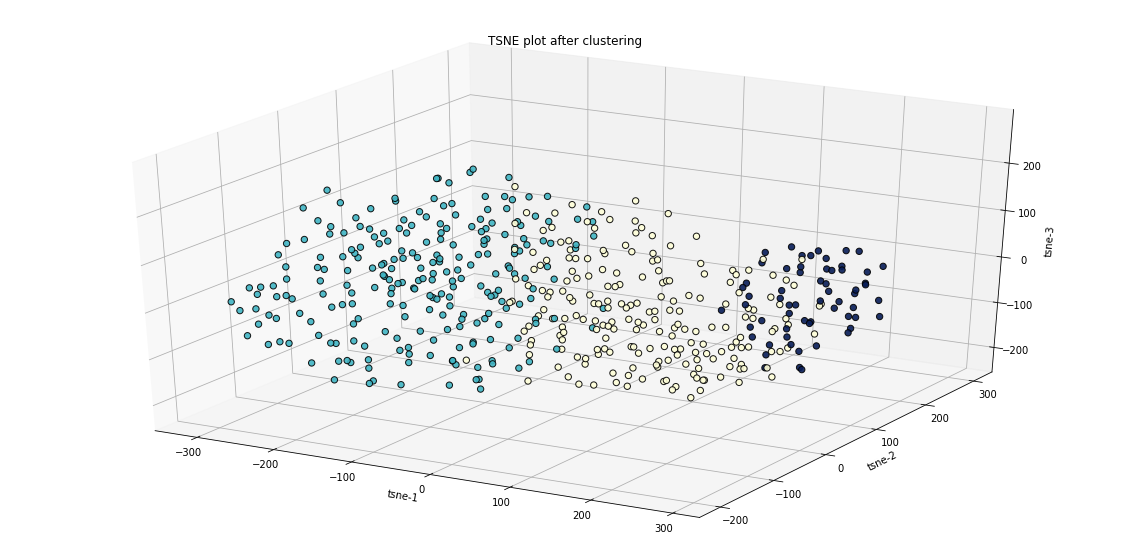

In [30]:
tsne = TSNE(n_components=3, verbose=1, perplexity=50, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(pca_df_scale)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_scale.iloc[:,0], tsne_df_scale.iloc[:,1], tsne_df_scale.iloc[:,2], 
            c=labels_pca_scale, cmap='YlGnBu',
            edgecolor='k', s=40, alpha = 0.9)


ax.set_title("TSNE plot after clustering")
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")
ax.dist = 10

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

#Processing the results

In [31]:
clusters_pca_scale.head()

pc0       pc1       pc2  ...       pc6       pc7  pca_clusters
0 -0.029146 -0.026240 -0.004539  ... -0.011308 -0.018796             0
1 -0.132566 -0.042289  0.032959  ...  0.007690  0.001401             1
2 -0.071279  0.008599  0.021254  ... -0.013172 -0.003683             1
3 -0.101865 -0.014895 -0.009458  ...  0.003902  0.008983             1
4 -0.185846  0.035574  0.089722  ... -0.002896 -0.010102             1

[5 rows x 9 columns]

In [32]:
clusters_pca_scale.shape

(503, 9)

In [33]:
all_comps = df_close.columns
print(len(all_comps))

503


In [34]:
clusters_pca_scale['Companies'] = all_comps
clusters_pca_scale = clusters_pca_scale.set_index(['Companies'])
clusters_pca_scale.head()

pc0       pc1       pc2  ...       pc6       pc7  pca_clusters
Companies                                ...                                  
MMM       -0.029146 -0.026240 -0.004539  ... -0.011308 -0.018796             0
ATVI      -0.132566 -0.042289  0.032959  ...  0.007690  0.001401             1
ACN       -0.071279  0.008599  0.021254  ... -0.013172 -0.003683             1
ABT       -0.101865 -0.014895 -0.009458  ...  0.003902  0.008983             1
ABMD      -0.185846  0.035574  0.089722  ... -0.002896 -0.010102             1

[5 rows x 9 columns]

In [35]:
companies_2020 = {'zero':[],
                  'one':[],
                  'two':[]} 

In [36]:
comp_clusters = pd.DataFrame(clusters_pca_scale, columns=['pca_clusters'])
comp_clusters.shape

(503, 1)

In [37]:
comp_clusters['Index'] = [i for i in range(503)]
comp_clusters = comp_clusters.set_index('Index')
comp_clusters['Companies'] = all_comps
comp_clusters.head()

pca_clusters Companies
Index                        
0                 0       MMM
1                 1      ATVI
2                 1       ACN
3                 1       ABT
4                 1      ABMD

In [38]:
for index, row in comp_clusters.iterrows():
    c = row['Companies']
    cluster = row['pca_clusters']
    if cluster==0:
        companies_2020['zero'].append(c)
    elif cluster==1:
        companies_2020['one'].append(c)   
    elif cluster==2:
        companies_2020['two'].append(c)    

In [39]:
print('Companies in 2020')
print('----------------------------------------------')
for key in companies_2020.keys():
    print(f'Companies in cluster {key} = {len(companies_2020[key])}')

Companies in 2020
----------------------------------------------
Companies in cluster zero = 207
Companies in cluster one = 235
Companies in cluster two = 61


In [41]:
filter_window = 5
def plot_save(comp):
    yhat = savgol_filter(df_close[comp], filter_window, 3)
    plt.figure(figsize=(10,6))
    plt.plot(yhat)
    plt.xlabel('Days')
    plt.ylabel('Closing price(USD)')
    plt.title('Closing prices of ' + comp_dict[comp])
    plt.grid()
    plt.savefig('/content/c_one/' + comp + '.png')
    plt.close()
    return

In [42]:
filter_window = 5
def plot_curve(comp):
    yhat = savgol_filter(df_close[comp], filter_window, 3)
    plt.figure(figsize=(6,4))
    plt.plot(yhat)
    plt.xlabel('Days')
    plt.ylabel('Closing price(USD)')
    plt.title('Closing prices of ' + comp_dict[comp])
    plt.grid()
    return

#Plotting first 5 data points from every cluster

* Recovery intensity : <b>Mediocre</b> <br>
* Recession period : <b>Narrow</b><br>
* Closing price reovery level : <b>Lesser than or equal to previous state</b>


In [44]:
from scipy.signal import savgol_filter

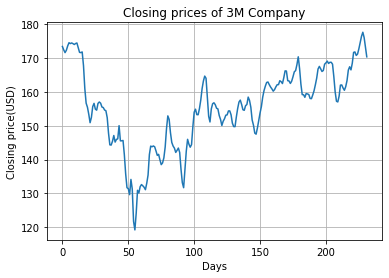

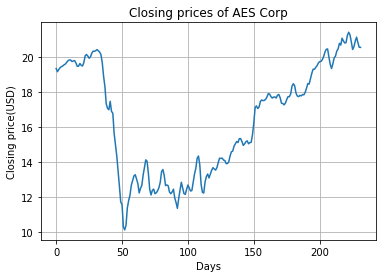

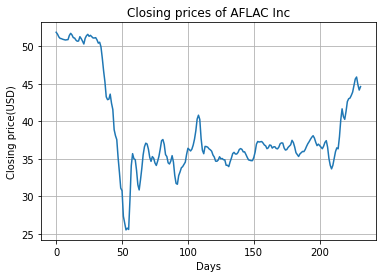

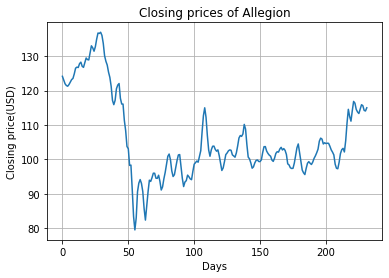

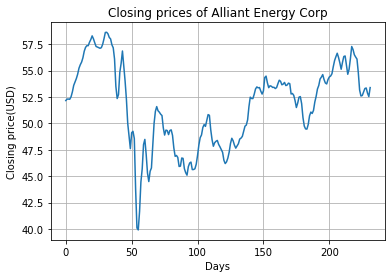

In [45]:
for c in companies_2020['zero'][0:5]:
    plot_curve(c) 

* Recovery intensity : <b>Strong</b> <br>
* Recession period : <b>Narrow</b><br>
* Closing price reovery level : <b>Greater than or equal to previous state</b>


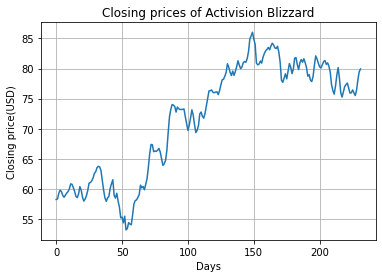

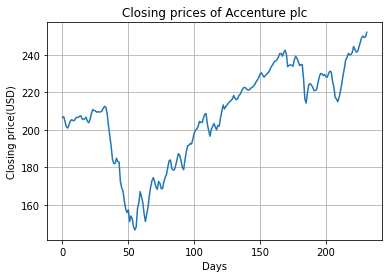

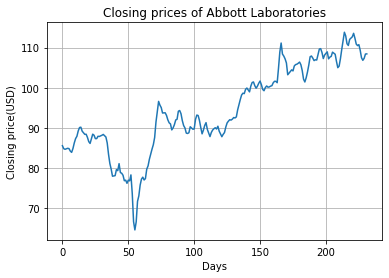

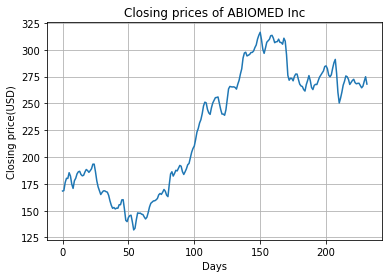

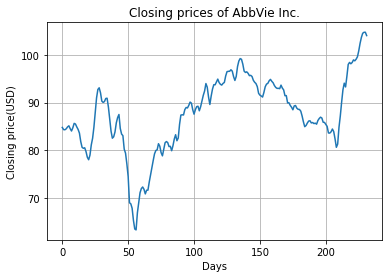

In [46]:
for c in companies_2020['one'][0:5]:
    plot_curve(c) 

* Recovery intensity : <b>Weak</b> <br>
* Recession period : <b>Wide</b><br>
* Closing price reovery level : <b>Lesser than previous state</b>


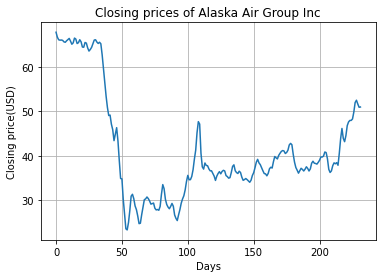

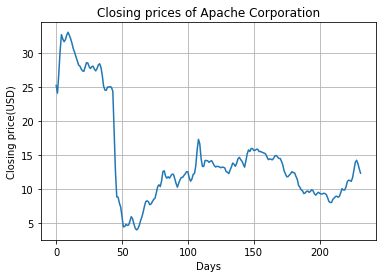

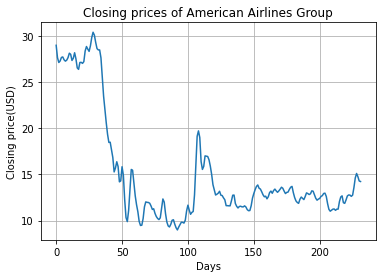

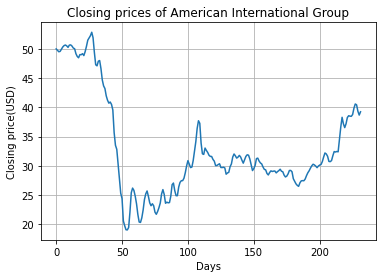

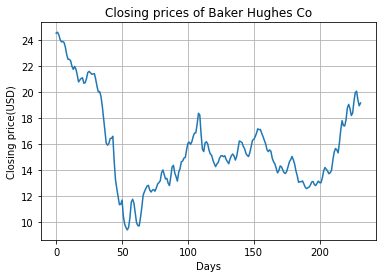

In [47]:
for c in companies_2020['two'][0:5]:
    plot_curve(c) 

<h2>Plotting last 5 companies in every cluster 

* Recovery intensity : <b>Mediocre</b> <br>
* Recession period : <b>Narrow</b><br>
* Closing price reovery level : <b>Lesser than or equal to previous state</b>


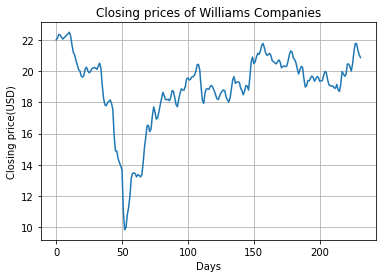

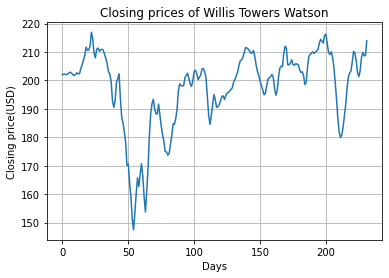

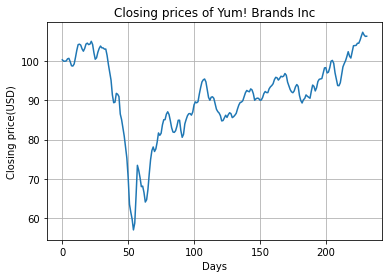

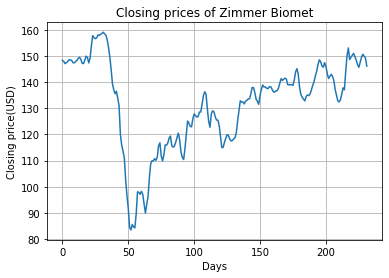

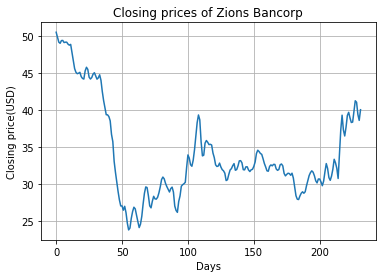

In [48]:
for c in companies_2020['zero'][-5:]:
    plot_curve(c)

* Recovery intensity : <b>Strong</b> <br>
* Recession period : <b>Narrow</b><br>
* Closing price reovery level : <b>Greater than or equal to previous state</b>




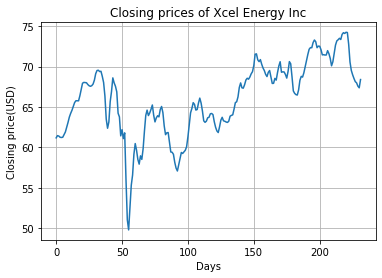

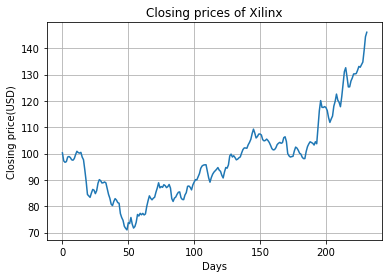

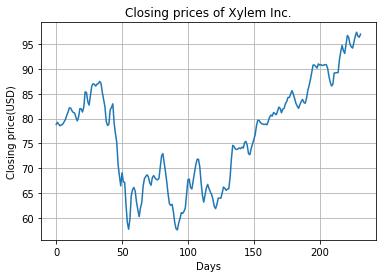

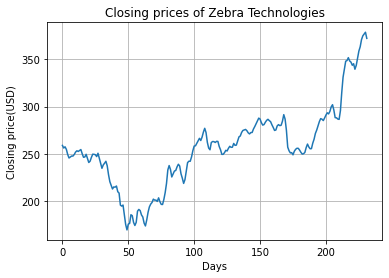

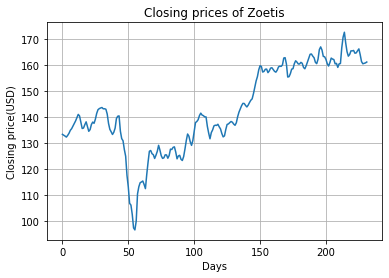

In [49]:
for c in companies_2020['one'][-5:]:
    plot_curve(c)

* Recovery intensity : <b>Weak</b> <br>
* Recession period : <b>Wide</b><br>
* Closing price reovery level : <b>Lesser than previous state</b>


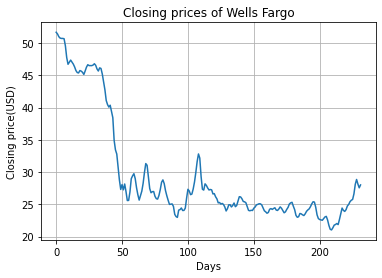

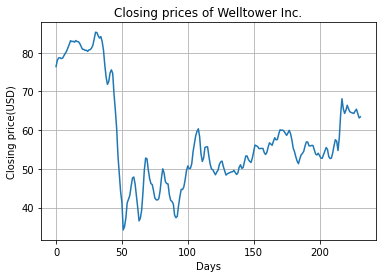

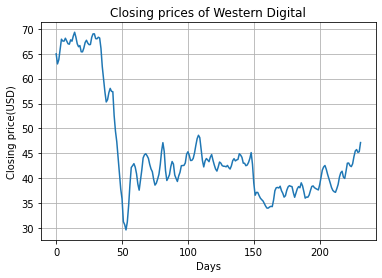

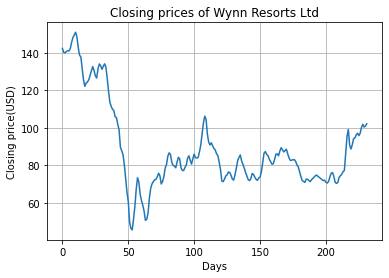

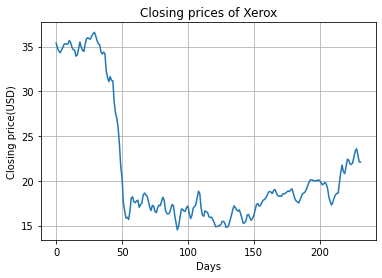

In [50]:
for c in companies_2020['two'][-5:]:
    plot_curve(c) 